<div style="direction:rtl;text-align:center"><img src="https://mohammadkh.ir/github/logo.png" alt="Mohammadkh.ir" style="width: 250px;"/></div>
<h1><div style="direction:rtl;text-align:center">Clustering</div></h1>

In [2]:
import rasterio
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.feature_extraction import image
from sklearn.cluster import KMeans, DBSCAN, SpectralBiclustering

# data

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 21600, 'height': 10800, 'count': 1, 'crs': None, 'transform': Affine(0.01666666666667, 0.0, -180.0,
       0.0, -0.01666666666667, 90.00000000000001)}
(1, 10800, 21600)


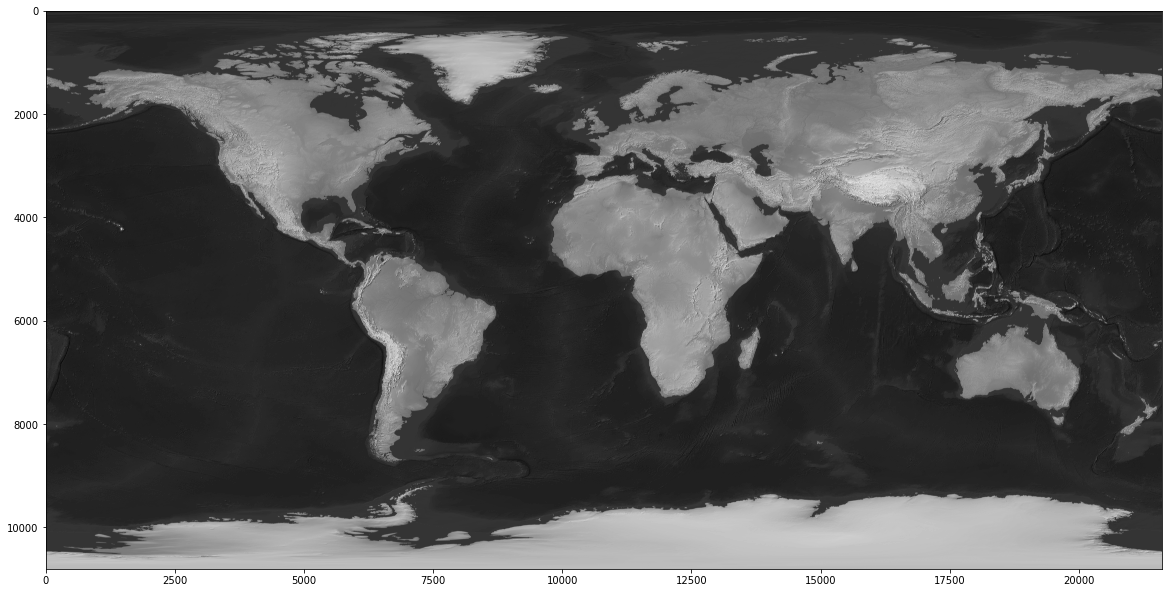

In [3]:
image = rasterio.open('../__data/GRAY_HR_SR_OB.tif')
print(image.meta)

image_arr = image.read()
print(np.shape(image_arr))

plt.figure(figsize=(20, 20))
plt.imshow(image_arr[0], cmap='gray')
plt.show()

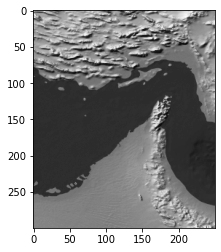

In [3]:
# select data
hormoz_image = image_arr[0][3000:4000, 13000:15000][700:, 1000:1250]
plt.figure(figsize=(8, 4))
plt.imshow(hormoz_image, cmap='gray')
plt.show()

In [4]:
with open('../__data/hormoz.pickle','wb') as f :
     pickle.dump(hormoz_image,f)

## preprocess data

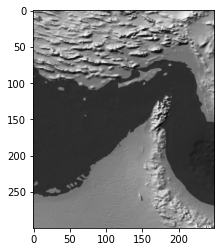

In [4]:
with open('../__data/hormoz.pickle','rb') as f :
    hormoz_image = pickle.load(f)
plt.figure(figsize=(8, 4))
plt.imshow(hormoz_image, cmap='gray')
plt.show()

In [8]:
# ex : hamsayegy har pix
sample_image = [
    [10, 20],
    [20, 10],
    [40, 100],
]
image.img_to_graph(sample_image).todense()

matrix([[ 10,  10,  10,   0,   0,   0],
        [ 10,  20,   0,  10,   0,   0],
        [ 10,   0,  20,  10,  20,   0],
        [  0,  10,  10,  10,   0,  90],
        [  0,   0,  20,   0,  40,  60],
        [  0,   0,   0,  90,  60, 100]])

In [ ]:
# cm = image.img_to_graph(hormoz_image)

# OR 

cm = []
for i in range(0, hormoz_image.shape[0]):
    for j in range(0, hormoz_image.shape[1]):
        if i == 0 or j == 0 or i == hormoz_image.shape[0] - 1 or j == hormoz_image.shape[1] - 1:
            p = abs(hormoz_image[i][j])
            cm.append([
                p, p, p, p, p, p, p, p, p
            ])
        else:
            f1 = abs(hormoz_image[i][j])
            f2 = abs(hormoz_image[i][j] - hormoz_image[i - 1][j])
            f3 = abs(hormoz_image[i][j] - hormoz_image[i + 1][j])
            f4 = abs(hormoz_image[i][j] - hormoz_image[i][j + 1])
            f5 = abs(hormoz_image[i][j] - hormoz_image[i][j - 1])
            f6 = abs(hormoz_image[i][j] - hormoz_image[i - 1][j + 1])
            f7 = abs(hormoz_image[i][j] - hormoz_image[i - 1][j - 1])
            f8 = abs(hormoz_image[i][j] - hormoz_image[i + 1][j - 1])
            f9 = abs(hormoz_image[i][j] - hormoz_image[i + 1][j + 1])
            cm.append([
                f1, f2, f3, f4, f5, f6, f7, f8, f9
            ])

# KMeans

In [10]:
kmeans = KMeans(n_clusters=5, max_iter=3000)
kmeans.fit(cm)
labels = kmeans.labels_
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4]),
 array([10716, 27072, 12478, 11261, 13473], dtype=int64))

In [11]:
labels_im = np.full(hormoz_image.shape, -1.)
hormoz_cls = hormoz_image.astype(bool)
labels_im[hormoz_cls] = labels

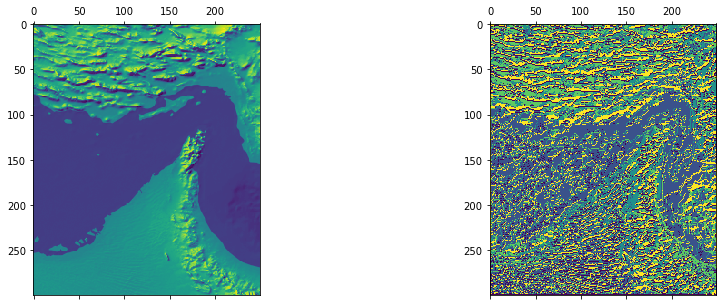

In [12]:
f,i = plt.subplots(1,2,figsize=(15,5))
i[0].matshow(hormoz_image)
i[1].matshow(labels_im)

# DBSCAN

In [13]:
dbscan = DBSCAN(eps=2, min_samples=3)
dbscan.fit(cm)
labels = dbscan.labels_
len(np.unique(labels, return_counts=True))

2

In [14]:
labels_im = np.full(hormoz_image.shape, -1.)
hormoz_cls = hormoz_image.astype(bool)
labels_im[hormoz_cls] = labels

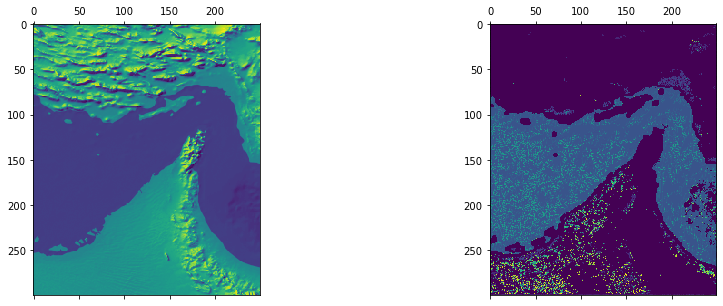

In [15]:
f,i = plt.subplots(1,2,figsize=(15,5))
i[0].matshow(hormoz_image)
i[1].matshow(labels_im)

# Spectral Biclustering

In [16]:
sbc = SpectralBiclustering(n_clusters=3)
sbc.fit(cm)
labels = sbc.row_labels_

In [17]:
labels_im = np.full(hormoz_image.shape, -1.)
hormoz_cls = hormoz_image.astype(bool)
labels_im[hormoz_cls] = labels

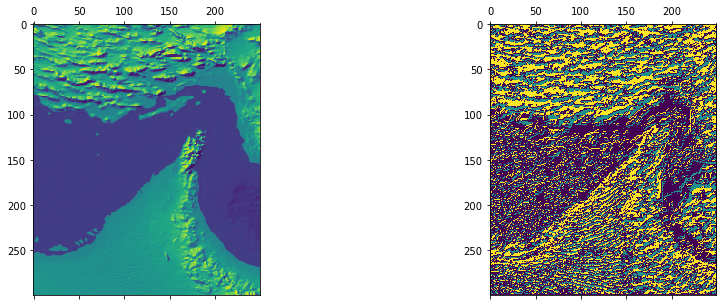

In [18]:
f,i = plt.subplots(1,2,figsize=(15,5))
i[0].matshow(hormoz_image)
i[1].matshow(labels_im)

<div class="alert alert-block alert-info">
<div style="direction:rtl;text-align:left"><strong>Clustering</strong><br>MohammadReza <strong>Khajedaloi</strong><br><br>
</div>
<div style="direction:rtl;text-align:right">
<a href="http://mohammadkh.ir/">WebSite</a> - <a href="https://github.com/khajedaloi/">GitHub</a> - <a href="https://www.linkedin.com/in/mohammad-kh/">Linkedin</a>
</div>
</div>